In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import ydata_profiling as yp
from ydata_profiling import ProfileReport

# creating connection to database
con = sqlite3.connect('C:/Users/Polina/OneDrive/Документы/DS/SQL/project_p', timeout=10)
cur = con.cursor()

# reading table for primary analysis
df = pd.read_csv('C:/Users/Polina/OneDrive/Документы/DS/SQL/Jobs_NYC_Postings.csv')

# examining data
print(df.head(5))

# checking amount of rows and type every column
# there are no missing value sin numerical fields, hence, there's no need to replace them with averge values in order to avoid data descrepancy
df.info()

# collecting statistics of numeric fields
print(df['# Of Positions'].describe())
print(df['Salary Range From'].describe())
print(df['Salary Range To'].describe())

# checking unique values of variables which are candidates to participate in analysis
print(df['Posting Type'].unique())
print(df['Title Classification'].unique())
print(df['Job Category'].unique())
print(df['Career Level'].unique())
print(df['Salary Frequency'].unique())
print(df['Salary Frequency'].unique())
print(df['Division/Work Unit'].unique())

# forming the report
profile = ProfileReport(df, title="Pandas Profiling Report")
# moving the report into html file
profile.to_file("your_report.html")
# deletion of 71 duplicate values

df.drop_duplicates()

# establishing new connection to csv file, which is an extract of SQL query result
df = pd.read_csv('/content/graph.csv')
# after SQl-based research, visualising graphs for different working areas:
hl = df[df['working_area']=='Health'].reset_index(drop=True)
ss = df[df['working_area']=='Social Services'].reset_index(drop=True)
td = df[df['working_area']=='Technology, Data & Innovation'].reset_index(drop=True)
fa = df[df['working_area']=='Finance, Accounting, & Procurement'].reset_index(drop=True)
la = df[df['working_area']=='Legal Affairs'].reset_index(drop=True)
hr = df[df['working_area']=='Human Resources'].reset_index(drop=True)
ea = df[df['working_area']=='Engineering, Architecture, & Planning'].reset_index(drop=True)

sns.lineplot(x='date', y='raiting', data=hl)
sns.lineplot(x='date', y='raiting', data=ss)
sns.lineplot(x='date', y='raiting', data=td)
sns.lineplot(x='date', y='raiting', data=fa)
sns.lineplot(x='date', y='raiting', data=la)
sns.lineplot(x='date', y='raiting', data=hr)
sns.lineplot(x='date', y='raiting', data=ea)

# establishing new connection to csv file, which is an extract of SQL query result
df = pd.read_csv('/content/raiting_avg.csv')

# visualising outliers of salaries by cereer level
sns.catplot(data=df, y="working_area", x="avg_salary_ceiling", kind="box", )

# salary by career level plot
salary_by_level = df[df['Salary Frequency']=="Annual"]
sns.catplot(
    data= salary_by_level, x="Career Level", y="Salary Range To",
    kind="violin", palette="pastel",
)
plt.title("Salary By Career level Plot")


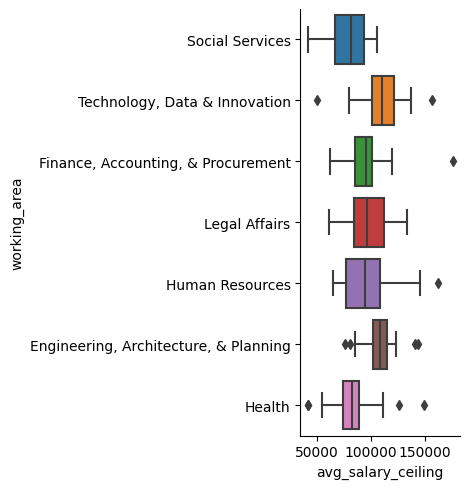

In [ ]:
sns.catplot(data=df, y="working_area", x="avg_salary_ceiling", kind="box", )

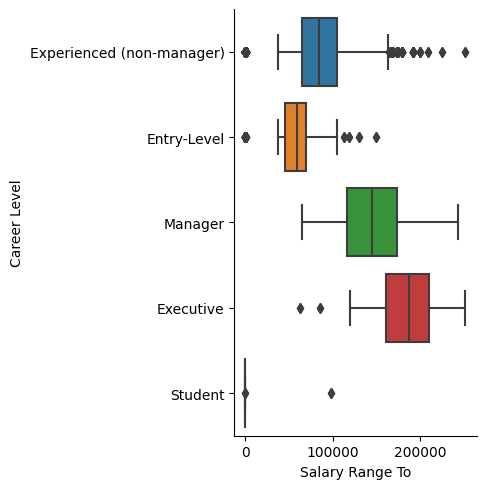

In [ ]:
df=pd.read_csv('/content/Jobs_NYC_Postings.csv')
sns.catplot(data=df, y="Career Level", x="Salary Range To", kind="box", )

Text(0.5, 1.0, 'Salary By Career level Plot')

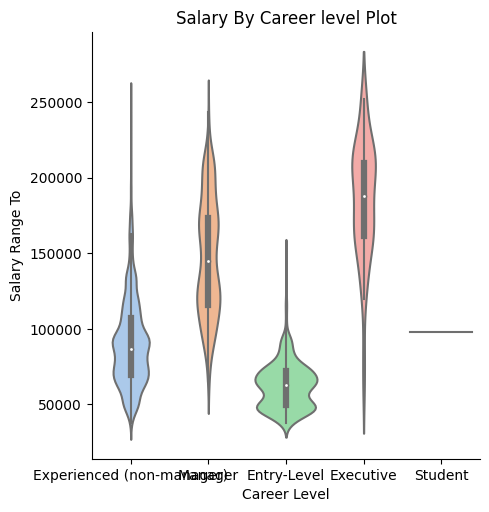

In [ ]:
salary_by_level = df[df['Salary Frequency']=="Annual"]
sns.catplot(
    data= salary_by_level, x="Career Level", y="Salary Range To",
    kind="violin", palette="pastel",
)
plt.title("Salary By Career level Plot")